## Project:

### WeRateDogs Wrangle and Analyze Data

## Key Points

### Key points to keep in mind when data wrangling:

- You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.

- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.

- Cleaning includes merging individual pieces of data according to the rules of tidy data.

- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.

- You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.


## Gather

In [1]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import json

### Load Tweets from twitter-archive-enhanced.csv

In [2]:
tweets = pd.read_csv('twitter-archive-enhanced.csv')

### Load imgs data frame Image Predictions File

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

if response.status_code == 200 :
    with open(url.split('/')[-1], mode='wb') as file:
        file.write(response.content)
    
    imgs_predicts = pd.read_csv('image-predictions.tsv',sep='\t')
else:
    print('Error in getting images predictions file')

### Load Additional Data via the Twitter API 

downloaded the file manually and load json

In [4]:
api_info = pd.read_json('tweet-json.txt' , lines=True)

## Assess

### Assess tweets df
- get info , stats about tweets df

### findings:
- interesting columns are: 'tweet_id', 'timestamp','text', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'

- unneeded columns
    - (retweet) related columns not needed : 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'
    
    - (in-reply) related columns, source and expanded_urls are not needed 
    
- Data Types:
    - tweet_id needed to be string
    - timestamp needed to be datetime
    - doggo,floofer,pupper and puppo should be one column (dog stage) of type category [tidiness]
    
- text column has both text and tweet url [tidiness]

- there are 745 row with name has None value. [Missing values]

- there are 79 row with name length < 3 , names have these values ['a', 'Bo', 'an', 'my', 'O', 'Mo', 'Jo', 'by', 'Al', 'Ed', 'JD' ]

- this list of bad names should be extracted from text or counted as missing name : ['a','an','Al','JD','O','my','by','the']

- there are 1976 row of tweets where all dog 'stage' are None. [Missing values]

- there are 14 row have multiple dog stage

- there are 23 row with rating denominator != 10 , 20 row > 10 and 3 rows < 10 [1 row with 0 ,1 row with 2 and 1 row with 7] ,all rating < 10 should be corrected manually

- After investigating the three entries with denominator< 10 , there are some data needed to be checked manually
    - rating at tweet in index 2335 should be extracted from text

- rating_numerator and rating_denominator should be one column reflect rating_numerator/rating_denominator of type float [tidiness]


In [5]:
tweets.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
290,838150277551247360,8.381455e+17,21955058.0,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
1753,678800283649069056,NaN,NaN,2015-12-21 04:52:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper with some mean tan lines. Snaz...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678800283...,12,10,None,None,None,pupper,None
574,801127390143516673,NaN,NaN,2016-11-22 18:17:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Anakin. He strives to r...,7.757333e+17,4.196984e+09,2016-09-13 16:30:07 +0000,https://twitter.com/dog_rates/status/775733305...,11,10,Anakin,doggo,None,None,None
215,851224888060895234,NaN,NaN,2017-04-10 00:06:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Snoop. His number one passion is sticking...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/851224888...,13,10,Snoop,None,None,None,None
144,863907417377173506,NaN,NaN,2017-05-15 00:02:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Albus. He's quite impressive at hide a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863907417...,13,10,Albus,None,None,None,None


In [6]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
tweets.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [8]:
tweets.duplicated().sum()

0

In [9]:
tweets.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [10]:
tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
#findings for columns : 'name'

print('there are {} tweets with name has None value.'.format(len(tweets[tweets['name'] == 'None'])))
print('there are {} tweets with len(name) < 3 '.format(tweets[tweets['name'].str.len() < 3]['name'].count()))

tweets[tweets['name'].str.len() < 3]['name'].value_counts()

there are 745 tweets with name has None value.
there are 79 tweets with len(name) < 3 


a     55
Bo     9
an     7
my     1
Mo     1
Jo     1
by     1
Al     1
Ed     1
JD     1
O      1
Name: name, dtype: int64

#### names retrived from text column

tweet at index 775:  O'Malley\
tweet at index 820:  Al Cabone\
tweet at index 852:  Zoey\
tweet at index 1853:  Wylie\
tweet at index 1955:  Kip\
tweet at index 2034:  Jacob (Yacōb)\
tweet at index 2041:  JD (stands for "just dog")\
tweet at index 2066:  Rufus\
tweet at index 2116:  Spork\
tweet at index 2125:  Cherokee\
tweet at index 2128:  Hemry\
tweet at index 2146:  Alphred\
tweet at index 2161:  Alfredo\
tweet at index 2191:  Leroi\
tweet at index 2204:  Berta\
tweet at index 2218:  Chuk\
tweet at index 2235:  Alfonso\
tweet at index 2249:  Cheryl\
tweet at index 2255:  Jessiga\
tweet at index 2264:  Klint\
tweet at index 2273:  Kohl\
tweet at index 2287:  Daryl\
tweet at index 2304:  Pepe\
tweet at index 2311:  Octaviath\
tweet at index 2314:  Johm

In [12]:
#findings for columns : 'name','text'
bad_names_list = ['a','an','Al','JD','O','my','by','the']
bad_names = tweets[tweets['name'].apply(lambda x:x in bad_names_list)]
print('there are {} tweets with bad names.'.format(len(bad_names)))

for i in bad_names.index:
    print('\ntweet at index {}:\n'.format(i),tweets.loc[i,'text'])

there are 75 tweets with bad names.

tweet at index 56:
 Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF

tweet at index 649:
 Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq

tweet at index 759:
 RT @dog_rates: This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR

tweet at index 775:
 This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC

tweet at index 801:
 Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn

tweet at index 820:
 Meet Al Cabone. He's a gangsta puppa. Rather h*ckin ruthless. Shows no mercy sometimes. 11/10 pet w extreme caution https://t.co/OUwWbEKOUV

tweet at

In [13]:
#findings for columns : 'doggo' , 'floofer' , 'pupper' , 'puppo'

print(tweets['doggo'].value_counts(),end='\n\n')
print(tweets['floofer'].value_counts(),end='\n\n')
print(tweets['pupper'].value_counts(),end='\n\n')
print(tweets['puppo'].value_counts(),end='\n\n')

None     2259
doggo      97
Name: doggo, dtype: int64

None       2346
floofer      10
Name: floofer, dtype: int64

None      2099
pupper     257
Name: pupper, dtype: int64

None     2326
puppo      30
Name: puppo, dtype: int64



In [14]:
not_doggo = tweets['doggo']=='None'
not_floofer = tweets['floofer']=='None'
not_pupper = tweets['pupper']=='None'
not_puppo = tweets['puppo']=='None'

#len(tweets[not_doggo & not_floofer & not_pupper & not_puppo])
print('there are {} tweets that has (None) value all dog stage.'.format(len(tweets[not_doggo & not_floofer & not_pupper & not_puppo])))

tweets[not_doggo & not_floofer & not_pupper & not_puppo].sample(5)

there are 1976 tweets that has (None) value all dog stage.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1959,673576835670777856,NaN,NaN,2015-12-06 18:56:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Sun burnt dog here. Quite large. Wants to prom...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673576835...,7,10,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
875,761227390836215808,NaN,NaN,2016-08-04 15:48:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Albert. He just found out that bees ar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761227390...,10,10,Albert,None,None,None,None
1134,728653952833728512,NaN,NaN,2016-05-06 18:33:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coleman. Somebody needs to tell him th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728653952...,8,10,Coleman,None,None,None,None
101,872668790621863937,NaN,NaN,2017-06-08 04:17:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @loganamnosis: Penelope here is doing me qu...,8.726576e+17,1.547674e+08,2017-06-08 03:32:35 +0000,https://twitter.com/loganamnosis/status/872657...,14,10,None,None,None,None,None


In [15]:
def multiple_dog_stage(row):
    return (row['doggo'] != 'None' and row['floofer'] != 'None') or \
(row['doggo'] != 'None' and row['pupper'] != 'None') or \
(row['doggo'] != 'None' and row['puppo'] != 'None') or \
(row['floofer'] != 'None' and row['pupper'] != 'None') or \
(row['floofer'] != 'None' and row['puppo'] != 'None') or \
(row['pupper'] != 'None' and row['puppo'] != 'None')

print('there are {} row with multiple dog_stage.'.format(tweets.apply(multiple_dog_stage ,axis =1).sum()))

there are 14 row with multiple dog_stage.


In [16]:
#findings for columns : 'rating_denominator'

tweets['rating_denominator'].value_counts().sort_values(ascending = False)

10     2333
11        3
50        3
80        2
20        2
7         1
2         1
16        1
40        1
0         1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
70        1
Name: rating_denominator, dtype: int64

In [17]:
#findings for columns : 'rating_numerator'

tweets['rating_numerator'].value_counts().sort_values(ascending = False)

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
121       1
80        1
204       1
24        1
143       1
99        1
45        1
27        1
17        1
1776      1
960       1
666       1
182       1
26        1
144       1
88        1
84        1
165       1
60        1
50        1
44        1
20        1
Name: rating_numerator, dtype: int64

#### rating retrived from text for tweets where rating_denominator < 10
tweet at index 313: 13/10 \
tweet at index 516: no rating \
tweet at index 2335 : 9/10 

In [18]:
#findings for columns : 'rating_numerator','rating_denominator'

print('there are {} row with deniminator != 10'.format(len(tweets[tweets['rating_denominator']!=10])))
print('there are {} row with deniminator > 10'.format(len(tweets[tweets['rating_denominator']>10])))
print('there are {} row with deniminator < 10'.format(len(tweets[tweets['rating_denominator'] < 10])))

#tweets.loc[tweets['rating_denominator'] < 10]

for i in tweets[tweets['rating_denominator'] < 10].index:
    print('\ntweet at index {}:\n'.format(i),tweets.loc[i,'text'])


there are 23 row with deniminator != 10
there are 20 row with deniminator > 10
there are 3 row with deniminator < 10

tweet at index 313:
 @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho

tweet at index 516:
 Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx

tweet at index 2335:
 This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv


In [19]:
#findings in columns : timestamp
# No tweets after '2017-08-02' to be dropped

tweets[tweets['timestamp'] > '2017-08-02']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Assess imgs_predicts df
- get info , stats about imgs_predicts df

### findings:
- Data Types:
    - tweet_id needed to be string
- images_predictions df has 324 row predicted not to be dogs in all three algorithms.
- predictions and predictions_conf could be merged in just one column with the prediction algo with the heightest conf [tidiness]
- there are 2075 entry in images_predictions while having 2356 entry in tweets archive [there will be missing data after join]

In [20]:
imgs_predicts.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
802,691459709405118465,https://pbs.twimg.com/media/CZiO7mWUEAAa4zo.jpg,1,Shetland_sheepdog,0.551206,True,collie,0.232544,True,Border_collie,0.095218,True
1340,758740312047005698,https://pbs.twimg.com/media/CoeWSJcUIAAv3Bq.jpg,1,Chesapeake_Bay_retriever,0.848514,True,Labrador_retriever,0.110054,True,curly-coated_retriever,0.025201,True
389,673359818736984064,https://pbs.twimg.com/media/CVhBLohWEAAXtYl.jpg,1,English_setter,0.696568,True,Brittany_spaniel,0.104046,True,Ibizan_hound,0.034832,True
1893,849412302885593088,https://pbs.twimg.com/media/C8m3-iQVoAAETnF.jpg,4,schipperke,0.907559,True,crossword_puzzle,0.017934,False,Chihuahua,0.016191,True
550,677547928504967168,https://pbs.twimg.com/media/CWciPonWEAUOqLD.jpg,1,American_Staffordshire_terrier,0.914978,True,Staffordshire_bullterrier,0.084395,True,boxer,0.000462,True


In [21]:
imgs_predicts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
imgs_predicts.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [23]:
imgs_predicts.duplicated().sum()

0

In [24]:
imgs_predicts.isnull().sum().sum()

0

In [25]:
imgs_predicts.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
p1_not_dog = imgs_predicts['p1_dog'] == False
p2_not_dog = imgs_predicts['p2_dog'] == False
p3_not_dog = imgs_predicts['p3_dog'] == False

#imgs_predicts[p1_not_dog & p2_not_dog & p3_not_dog].sample(5)

print('images_predictions df has {} row predicted not to be dogs in all three algorithms.'.format(len(imgs_predicts[p1_not_dog & p2_not_dog & p3_not_dog])))

images_predictions df has 324 row predicted not to be dogs in all three algorithms.


### Assess api_info df
- get info , stats about api_info df

### findings:
- Data Types:
    - tweet_id needed to be string
- the interesting columns are 'id', 'full_text', 'retweet_count', 'favorite_count'
- there is 1 row with 0 retweet_count
- there are 179 row with 0 favorite_count
- there are 2354 entry in api_info while having 2356 entry in tweets archive [there will be missing data after join]

In [27]:
api_info = api_info[['id', 'full_text', 'retweet_count', 'favorite_count']]
api_info.sample(5)

,id,full_text,retweet_count,favorite_count
420,821886076407029760,This is Jimison. He was just called a good boy...,2692,12582
1460,694905863685980160,This is Archie. He's a Bisquick Taj Mapaw. Too...,1053,3046
1677,682032003584274432,This is Ulysses. He likes holding hands and hi...,2294,7223
83,876484053909872640,This is Benedict. He wants to thank you for th...,2511,19163
1277,708845821941387268,Here's a pupper with magic eyes. Not wearing a...,1015,3226


In [28]:
api_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   int64 
 1   full_text       2354 non-null   object
 2   retweet_count   2354 non-null   int64 
 3   favorite_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [29]:
api_info.duplicated().sum()

0

In [30]:
api_info.isnull().sum()

id                0
full_text         0
retweet_count     0
favorite_count    0
dtype: int64

In [31]:
api_info.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [32]:
#checking rows with min retweet_count , favorit_count

#api_info[api_info['retweet_count']==0]
api_info[api_info['favorite_count']==0 ]

,id,full_text,retweet_count,favorite_count
31,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,108,0
35,885311592912609280,RT @dog_rates: This is Lilly. She just paralle...,19297,0
67,879130579576475649,RT @dog_rates: This is Emmy. She was adopted t...,7181,0
72,878404777348136964,RT @dog_rates: Meet Shadow. In an attempt to r...,1349,0
73,878316110768087041,RT @dog_rates: Meet Terrance. He's being yelle...,6965,0
...,...,...,...,...
1021,746521445350707200,RT @dog_rates: This is Shaggy. He knows exactl...,1110,0
1041,743835915802583040,RT @dog_rates: Extremely intelligent dog here....,2387,0
1240,711998809858043904,RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,138,0
2257,667550904950915073,RT @dogratingrating: Exceptional talent. Origi...,37,0


In [33]:
api_info['favorite_count'].value_counts()

0        179
610        3
345        3
2918       3
1691       3
        ... 
33345      1
814        1
23108      1
2630       1
8143       1
Name: favorite_count, Length: 2007, dtype: int64

### Quality

#### `tweets` df
- Retweet and Reply related columns needed to to dropped
- Erroneous datatypes
    - tweet_id needed to be string
    - timestamp needed to be datetime
- name column has entries with 'None' as value
- name column has entries with bad names from list ['a','an','Al','JD','O','my','by','the'] and should be extracted from text or counted as missing name
    - tweet at index 775: O'Malley
    - tweet at index 820: Al Cabone
    - tweet at index 852: Zoey
    - tweet at index 1853: Wylie
    - tweet at index 1955: Kip
    - tweet at index 2034: Jacob (Yacōb)
    - tweet at index 2041: JD (stands for "just dog")
    - tweet at index 2066: Rufus
    - tweet at index 2116: Spork
    - tweet at index 2125: Cherokee
    - tweet at index 2128: Hemry
    - tweet at index 2146: Alphred
    - tweet at index 2161: Alfredo
    - tweet at index 2191: Leroi
    - tweet at index 2204: Berta
    - tweet at index 2218: Chuk
    - tweet at index 2235: Alfonso
    - tweet at index 2249: Cheryl
    - tweet at index 2255: Jessiga
    - tweet at index 2264: Klint
    - tweet at index 2273: Kohl
    - tweet at index 2287: Daryl
    - tweet at index 2304: Pepe
    - tweet at index 2311: Octaviath
    - tweet at index 2314: Johm
    
- 'doggo' , 'floofer' , 'pupper' , 'puppo' columns have 'None' values and there are entries with None values combined in all dog stage.
- rating_denominator column has values less than 10 [0,2,7] should be extracted from text
    - tweet at index 313: 13/10
    - tweet at index 516: no rating
    - tweet at index 2335 : 9/10

#### `imgs_predicts` df
- Erroneous datatypes
    - tweet_id needed to be string
- df has entries predicted not to be dogs by all applied algorithms

#### `api_info` df
- api_info df has many columns needed to be dropped
- Erroneous datatypes
    - tweet_id needed to be string


### Tidiness

#### `tweets` df
- text column should be splitted in two columns tweet_text ,tweet_url
- doggo,floofer,pupper and puppo should be one column (dog stage) of type category.
- rating_numerator, rating_denominator should be one column reflects rating_numerator/rating_denominator of type float.

#### `imgs_predicts` df
- prediction and prediction confifance should be one column reflects the heightest confidence

#### `api_info` df
- should be added to tweets df

## Clean

In [34]:
tweets_clean = tweets.copy()
imgs_predicts_clean = imgs_predicts.copy()
api_info_clean = api_info.copy()

### Drop unneeded columns

### Define

#### `tweets_clean` df

#### Quality Issue
- interesting columns are: 'tweet_id', 'timestamp','text', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'

#### `api_info_clean` df

#### Quality Issue
- interesting columns are 'id', 'retweet_count', 'favorite_count'

#### Quality Issue
- rename 'id' to 'tweet_id'
    

#### Code

In [35]:
tweets_clean = tweets_clean[['tweet_id', 'timestamp','text', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']]
api_info_clean = api_info_clean[['id', 'retweet_count', 'favorite_count']]
api_info_clean.rename(columns={'id':'tweet_id'},inplace=True)

#### Test

In [36]:
print(tweets_clean.columns,end='\n\n')
print(api_info_clean.columns,end='\n\n')

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')



### Erroneous datatypes

### Define

#### `tweets_clean` df

#### Quality Issue
- Erroneous datatypes
    - tweet_id needed to be string
    - timestamp needed to be datetime
    
#### `imgs_predicts_clean` df

#### Quality Issue
- Erroneous datatypes
    - tweet_id needed to be string
    
#### `api_info_clean` df

#### Quality Issue
- Erroneous datatypes
    - tweet_id needed to be string

#### Code

In [37]:
tweets_clean['tweet_id'] = tweets_clean['tweet_id'].astype(str)
tweets_clean['timestamp'] = pd.to_datetime(tweets_clean['timestamp'])

imgs_predicts_clean['tweet_id'] = imgs_predicts_clean['tweet_id'].astype(str)

api_info_clean['tweet_id'] = api_info_clean['tweet_id'].astype(str)

#### Test

In [38]:
print('Datatype For tweets_clean[\'tweet_id\'] is {} .'.format(tweets_clean['tweet_id'].dtype))
print('Datatype For tweets_clean[\'timestamp\'] is {} .'.format(tweets_clean['timestamp'].dtype) )
print('Datatype For imgs_predicts_clean[\'tweet_id\'] is {} .'.format(imgs_predicts_clean['tweet_id'].dtype) )
print('Datatype For api_info_clean[\'tweet_id\'] is {} .'.format(api_info_clean['tweet_id'].dtype) )

Datatype For tweets_clean['tweet_id'] is object .
Datatype For tweets_clean['timestamp'] is datetime64[ns, UTC] .
Datatype For imgs_predicts_clean['tweet_id'] is object .
Datatype For api_info_clean['tweet_id'] is object .


### Tidiness

### Difine

#### Issue #1
- text column should be splitted in two columns tweet_text ,tweet_url and drop the old text column

#### Code

In [39]:
tweets_clean['tweet_text']  = tweets_clean['text'].str.split('https',1, expand=True)[0]
tweets_clean['tweet_url']  = 'https' + tweets_clean['text'].str.split('https',1, expand=True)[1]

tweets_clean.drop('text',axis=1,inplace=True)

#### Test

In [40]:
tweets_clean.sample(5)

,tweet_id,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_text,tweet_url
365,829011960981237760,2017-02-07 17:00:28+00:00,13,10,Dexter,None,None,None,None,This is Dexter. He was reunited with his mom y...,https://t.co/U50RlRw4is
8,890609185150312448,2017-07-27 16:25:51+00:00,13,10,Zoey,None,None,None,None,This is Zoey. She doesn't want to be one of th...,https://t.co/9TwLuAGH0b
1756,678767140346941444,2015-12-21 02:41:11+00:00,8,10,Mia,None,None,None,None,This is Mia. She makes awful decisions. 8/10,https://t.co/G6TQVgTcZz
1839,675891555769696257,2015-12-13 04:14:39+00:00,6,10,Donny,None,None,None,None,This is Donny. He's summoning the demon monste...,https://t.co/kiW6Knb7Gp
1881,675003128568291329,2015-12-10 17:24:21+00:00,12,10,Laela,None,None,None,None,Meet Laela. She's adorable. Magnificent eyes. ...,https://t.co/pCGDgLkLo6


### Define

#### Quality Issue
- doggo,floofer,pupper and puppo have 'None' string as value should be replaced with np.nan

#### Tidiness Issue #2
- doggo,floofer,pupper and puppo should be one column (dog stage) of type category.

#### Code 

In [41]:
tweets_clean['doggo'] = tweets_clean['doggo'].replace('None',np.nan)
tweets_clean['floofer'] = tweets_clean['floofer'].replace('None',np.nan)
tweets_clean['pupper'] = tweets_clean['pupper'].replace('None',np.nan)
tweets_clean['puppo'] = tweets_clean['puppo'].replace('None',np.nan)

#### Test

In [42]:
print(tweets_clean['doggo'].value_counts(dropna=False),end='\n\n')
print(tweets_clean['floofer'].value_counts(dropna=False),end='\n\n')
print(tweets_clean['pupper'].value_counts(dropna=False),end='\n\n')
print(tweets_clean['puppo'].value_counts(dropna=False),end='\n\n')

NaN      2259
doggo      97
Name: doggo, dtype: int64

NaN        2346
floofer      10
Name: floofer, dtype: int64

NaN       2099
pupper     257
Name: pupper, dtype: int64

NaN      2326
puppo      30
Name: puppo, dtype: int64



In [43]:
def get_dog_stage(row):
    if not pd.isnull(row['doggo']) :
        return 'doggo'
    if not pd.isnull(row['floofer']) :
        return 'floofer'
    if not pd.isnull(row['pupper']) :
        return 'pupper'
    if not pd.isnull(row['puppo']) :
        return 'puppo'

    return np.nan

tweets_clean['dog_stage'] = tweets_clean.apply(get_dog_stage , axis=1).astype('category')


#### Test

In [44]:
print(tweets_clean['dog_stage'].value_counts(dropna=False),end='\n\n')

NaN        1976
pupper      245
doggo        97
puppo        29
floofer       9
Name: dog_stage, dtype: int64



In [45]:
#remove dog_stage splitted columns

tweets_clean.drop(columns=['doggo','floofer','pupper','puppo'],inplace=True)

#### Test

In [46]:
tweets_clean.columns

Index(['tweet_id', 'timestamp', 'rating_numerator', 'rating_denominator',
       'name', 'tweet_text', 'tweet_url', 'dog_stage'],
      dtype='object')

### Define

#### Quality Issue
- rating_denominator column has values less than 10 [0,2,7] should be extracted from text
    - tweet at index 313: 13/10
    - tweet at index 516: no rating
    - tweet at index 2335 : 9/10

#### Tidiness Issue #3
- rating_numerator, rating_denominator should be one column reflects rating_numerator/rating_denominator of type float.

#### Code

In [47]:
tweets_clean.loc[313,['rating_numerator','rating_denominator']]=[13,10]
tweets_clean.loc[516,['rating_numerator','rating_denominator']]=[np.nan,np.nan]
tweets_clean.loc[2335,['rating_numerator','rating_denominator']]=[9,10]

### Test

In [48]:
print( tweets_clean.loc[313,['rating_numerator','rating_denominator']], end='\n\n')
print( tweets_clean.loc[313,['rating_numerator','rating_denominator']], end='\n\n')
print( tweets_clean.loc[313,['rating_numerator','rating_denominator']], end='\n\n')

rating_numerator      13
rating_denominator    10
Name: 313, dtype: object

rating_numerator      13
rating_denominator    10
Name: 313, dtype: object

rating_numerator      13
rating_denominator    10
Name: 313, dtype: object



In [49]:
tweets_clean['rating'] = tweets_clean['rating_numerator'] / tweets_clean['rating_denominator']

#### Test

In [50]:
tweets_clean.loc[tweets_clean['rating']< 1 ,['rating','rating_numerator','rating_denominator']].sample(10)

,rating,rating_numerator,rating_denominator
1104,0.9,9.0,10.0
1970,0.8,8.0,10.0
2327,0.7,7.0,10.0
1164,0.8,8.0,10.0
2044,0.6,6.0,10.0
1709,0.9,9.0,10.0
2163,0.6,6.0,10.0
2320,0.7,7.0,10.0
1573,0.7,7.0,10.0
1504,0.8,8.0,10.0


In [51]:
tweets_clean.loc[tweets_clean['rating']> 1 ,['rating','rating_numerator',]].sample(10)

,rating,rating_numerator
253,1.3,13.0
1051,1.1,11.0
635,1.2,12.0
117,1.4,14.0
770,1.3,13.0
617,1.2,12.0
2053,1.1,11.0
1217,1.2,12.0
68,1.4,14.0
852,1.3,13.0


In [52]:
tweets_clean.drop(columns=['rating_numerator','rating_denominator'],inplace=True)

#### Test

In [53]:
tweets_clean.columns

Index(['tweet_id', 'timestamp', 'name', 'tweet_text', 'tweet_url', 'dog_stage',
       'rating'],
      dtype='object')

In [54]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   tweet_id    2356 non-null   object             
 1   timestamp   2356 non-null   datetime64[ns, UTC]
 2   name        2356 non-null   object             
 3   tweet_text  2356 non-null   object             
 4   tweet_url   2286 non-null   object             
 5   dog_stage   380 non-null    category           
 6   rating      2355 non-null   float64            
dtypes: category(1), datetime64[ns, UTC](1), float64(1), object(4)
memory usage: 113.1+ KB


### Define

#### tidiness Issue #4
- `api_info` df should be added to tweets df


#### Code

In [55]:
tweets_clean = tweets_clean.merge(api_info_clean)

#### Test

In [56]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2354 non-null   object             
 1   timestamp       2354 non-null   datetime64[ns, UTC]
 2   name            2354 non-null   object             
 3   tweet_text      2354 non-null   object             
 4   tweet_url       2284 non-null   object             
 5   dog_stage       379 non-null    category           
 6   rating          2353 non-null   float64            
 7   retweet_count   2354 non-null   int64              
 8   favorite_count  2354 non-null   int64              
dtypes: category(1), datetime64[ns, UTC](1), float64(1), int64(2), object(4)
memory usage: 168.0+ KB


### Define

#### Quality Issue
- first we need to remove entries where all three algo. detected not to be dog

#### tidiness Issue #5
- prediction and prediction confidance should be one column reflects the heightest confidence and drop p1,p1_conf,p2,p2_conf,p3,p3_conf

- take highest prediction confidance with the predict,is_dog as the needed values 


#### Code

In [57]:
# imgs_predicts_clean has 2075 observation ,and 324 observation predicted not dog by all three algorithms

imgs_predicts_clean = imgs_predicts_clean[ (imgs_predicts_clean['p1_dog']==True) | (imgs_predicts_clean['p2_dog']==True) | (imgs_predicts_clean['p3_dog']==True)]


#### Test

In [58]:
len(imgs_predicts_clean[ (imgs_predicts_clean['p1_dog']==False) & (imgs_predicts_clean['p2_dog']==False) & (imgs_predicts_clean['p3_dog']==False)])


0

In [59]:
imgs_predicts_clean['predict_conf'] = imgs_predicts_clean[['p1_conf', 'p2_conf','p3_conf']].max(axis=1)

def get_predict_based_conf(row):
    if row['predict_conf'] == row['p1_conf'] :
        return  pd.Series([row['p1'],row['p1_dog']])
    if row['predict_conf'] == row['p2_conf'] :
        return  pd.Series([row['p2'],row['p1_dog']])
    if row['predict_conf'] == row['p3_conf'] :
        return  pd.Series([row['p3'],row['p1_dog']])
    
imgs_predicts_clean[['predict','is_dog']]= imgs_predicts_clean.apply(get_predict_based_conf,axis=1)

#### Test

In [60]:
imgs_predicts_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tweet_id      1751 non-null   object 
 1   jpg_url       1751 non-null   object 
 2   img_num       1751 non-null   int64  
 3   p1            1751 non-null   object 
 4   p1_conf       1751 non-null   float64
 5   p1_dog        1751 non-null   bool   
 6   p2            1751 non-null   object 
 7   p2_conf       1751 non-null   float64
 8   p2_dog        1751 non-null   bool   
 9   p3            1751 non-null   object 
 10  p3_conf       1751 non-null   float64
 11  p3_dog        1751 non-null   bool   
 12  predict_conf  1751 non-null   float64
 13  predict       1751 non-null   object 
 14  is_dog        1751 non-null   bool   
dtypes: bool(4), float64(4), int64(1), object(6)
memory usage: 171.0+ KB


In [61]:
#drop unneeded columns

imgs_predicts_clean.drop(columns=['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],inplace=True)

#### Test

In [62]:
imgs_predicts_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'predict_conf', 'predict', 'is_dog'], dtype='object')

### Quality

### Define

#### Issue
- name column has entries with 'None' string as value which should be replaced with np.nan

#### Code

In [63]:
tweets_clean['name'] = tweets_clean['name'].replace('None',np.nan)

#### Test

In [64]:
len(tweets_clean[tweets_clean['name']=='None'])

0

In [65]:
tweets_clean['name'].value_counts(dropna=False)

NaN        744
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Monkey       1
Toffee       1
Robin        1
Aldrick      1
Sora         1
Name: name, Length: 957, dtype: int64

### Define

#### Issue
- name column has entries with bad names from list ['a','an','Al','JD','O','my','by','the'] and should be extracted from text or counted as missing name
    - tweet at index 775: O'Malley
    - tweet at index 820: Al Cabone
    - tweet at index 852: Zoey
    - tweet at index 1853: Wylie
    - tweet at index 1955: Kip
    - tweet at index 2034: Jacob (Yacōb)
    - tweet at index 2041: JD (stands for "just dog")
    - tweet at index 2066: Rufus
    - tweet at index 2116: Spork
    - tweet at index 2125: Cherokee
    - tweet at index 2128: Hemry
    - tweet at index 2146: Alphred
    - tweet at index 2161: Alfredo
    - tweet at index 2191: Leroi
    - tweet at index 2204: Berta
    - tweet at index 2218: Chuk
    - tweet at index 2235: Alfonso
    - tweet at index 2249: Cheryl
    - tweet at index 2255: Jessiga
    - tweet at index 2264: Klint
    - tweet at index 2273: Kohl
    - tweet at index 2287: Daryl
    - tweet at index 2304: Pepe
    - tweet at index 2311: Octaviath
    - tweet at index 2314: Johm

#### Code

In [66]:
tweets_clean['name'] = tweets_clean['name'].replace(['a','an','Al','JD','O','my','by','the'],np.nan)
tweets_clean.loc[775,'name'] = 'O\'Malley'
tweets_clean.loc[820,'name'] = 'Al Cabone'
tweets_clean.loc[852,'name'] = 'Zoey'
tweets_clean.loc[1853,'name'] = 'Wylie'
tweets_clean.loc[1955,'name'] = 'Kip'
tweets_clean.loc[2034,'name'] = 'Jacob (Yacōb)'
tweets_clean.loc[2041,'name'] = 'JD'
tweets_clean.loc[2066,'name'] = 'Rufus'
tweets_clean.loc[2116,'name'] = 'Spork'
tweets_clean.loc[2125,'name'] = 'Cherokee'
tweets_clean.loc[2128,'name'] = 'Hemry'
tweets_clean.loc[2146,'name'] = 'Alphred'
tweets_clean.loc[2161,'name'] = 'Alfredo'
tweets_clean.loc[2191,'name'] = 'Leroi'
tweets_clean.loc[2204,'name'] = 'Berta'
tweets_clean.loc[2218,'name'] = 'Chuk'
tweets_clean.loc[2235,'name'] = 'Alfonso'
tweets_clean.loc[2249,'name'] = 'Cheryl'
tweets_clean.loc[2255,'name'] = 'Jessiga'
tweets_clean.loc[2264,'name'] = 'Klint'
tweets_clean.loc[2273,'name'] = 'Kohl'
tweets_clean.loc[2287,'name'] = 'Daryl'
tweets_clean.loc[2304,'name'] = 'Pepe'
tweets_clean.loc[2311,'name'] = 'Octaviath'
tweets_clean.loc[2314,'name'] = 'Johm'

#### Test

In [67]:
tweets_clean['name'].value_counts(dropna=False)

NaN        812
Charlie     12
Cooper      11
Lucy        11
Oliver      11
          ... 
Spork        1
Puff         1
Monkey       1
Toffee       1
Sora         1
Name: name, Length: 963, dtype: int64

### Save Cleaned Data

In [68]:
tweets_clean.to_csv('twitter_archive_master.csv', index=False)
imgs_predicts_clean.to_csv('imgs_predicts_master.csv', index=False)

### Insights and visualizations from cleaned data

In [69]:
%matplotlib inline

In [70]:
tweets_clean.describe()

,rating,retweet_count,favorite_count
count,2353.000000,2354.000000,2354.000000
mean,1.221273,3164.797366,8080.968564
std,4.084945,5284.770364,11814.771334
min,0.000000,0.000000,0.000000
25%,1.000000,624.500000,1415.000000
50%,1.100000,1473.500000,3603.500000
75%,1.200000,3652.000000,10122.250000
max,177.600000,79515.000000,132810.000000


### Insight :
- Tweet with max retweet count is not the one with max favorite count 
- but there should be positive correlation between retweet_count and favorite_count

In [71]:
print('tweet with max retweet count : {}'.format(tweets_clean.loc[tweets_clean['retweet_count'].idxmax() , 'tweet_id']))
print('tweet with max favorite count : {}'.format(tweets_clean.loc[tweets_clean['favorite_count'].idxmax() , 'tweet_id']))

tweet with max retweet count : 744234799360020481
tweet with max favorite count : 822872901745569793


#### Retweet Count and Favorite Count should have positive correlation

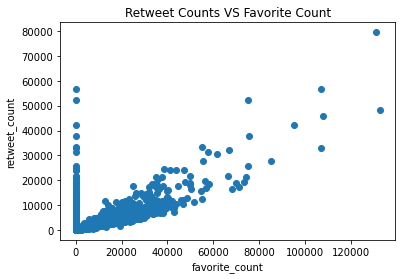

In [72]:
plt.scatter(tweets_clean['favorite_count'],tweets_clean['retweet_count'])
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')
plt.title('Retweet Counts VS Favorite Count')
plt.savefig('./plots/retweet_and_favorite_count.png')

#### Insight :
- Most tweets about pupper dogs

In [73]:
tweets_clean['dog_stage'].value_counts()

pupper     244
doggo       97
puppo       29
floofer      9
Name: dog_stage, dtype: int64

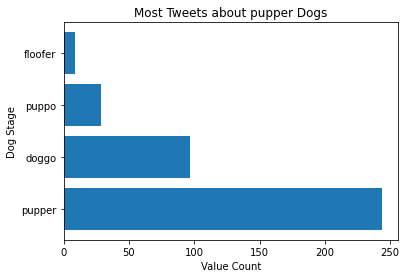

In [74]:
plt.barh([1, 2, 3, 4], tweets_clean['dog_stage'].value_counts().sort_values(ascending=False), tick_label=['pupper', 'doggo' ,'puppo','floofer' ])
plt.xlabel('Value Count')
plt.ylabel('Dog Stage')
plt.title('Most Tweets about pupper Dogs')
plt.savefig('./plots/most_liked_dog_stage.png')

#### Insight:
- top 10 most common names for dogs

In [75]:
tweets_clean['name'].value_counts().sort_values(ascending = False).head(10)

Charlie    12
Oliver     11
Cooper     11
Lucy       11
Tucker     10
Penny      10
Lola       10
Bo          9
Winston     9
Sadie       8
Name: name, dtype: int64

In [76]:
imgs_predicts_clean.describe()

,img_num,predict_conf
count,1751.000000,1751.000000
mean,1.214734,0.604207
std,0.574337,0.265911
min,1.000000,0.044333
25%,1.000000,0.377079
50%,1.000000,0.605304
75%,1.000000,0.848720
max,4.000000,0.999984


In [77]:
merged_df = tweets_clean.merge(imgs_predicts_clean)

In [78]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1750 entries, 0 to 1749
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1750 non-null   object             
 1   timestamp       1750 non-null   datetime64[ns, UTC]
 2   name            1256 non-null   object             
 3   tweet_text      1750 non-null   object             
 4   tweet_url       1750 non-null   object             
 5   dog_stage       270 non-null    category           
 6   rating          1749 non-null   float64            
 7   retweet_count   1750 non-null   int64              
 8   favorite_count  1750 non-null   int64              
 9   jpg_url         1750 non-null   object             
 10  img_num         1750 non-null   int64              
 11  predict_conf    1750 non-null   float64            
 12  predict         1750 non-null   object             
 13  is_dog          1750 non-null   b

#### Insight : 
- Predict with heighest number of tweets belong to golden_retriever

In [79]:
merged_df['predict'].value_counts().sort_values(ascending=False)

golden_retriever      150
Labrador_retriever    100
Pembroke               88
Chihuahua              83
pug                    57
                     ... 
rain_barrel             1
tabby                   1
maillot                 1
standard_schnauzer      1
feather_boa             1
Name: predict, Length: 215, dtype: int64

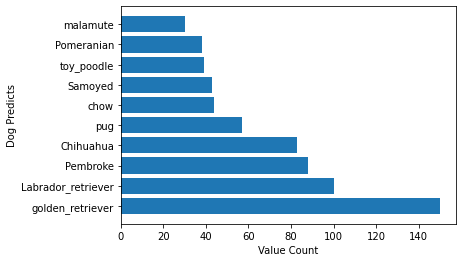

In [80]:
labels = merged_df['predict'].value_counts().sort_values(ascending=False).index
plt.barh(range(10),merged_df['predict'].value_counts().sort_values(ascending=False).head(10), tick_label=labels[:10])
plt.xlabel('Value Count')
plt.ylabel('Dog Predicts')
plt.savefig('./plots/common_dog_predict_tweets.png')